In [ ]:
#importing python packages
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

In [ ]:
 #files upload
 from google.colab import files
 files.upload()

Saving Iris (1).csv to Iris (1).csv


{'Iris (1).csv': b'Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\n1,5.1,3.5,1.4,0.2,Iris-setosa\n2,4.9,3.0,1.4,0.2,Iris-setosa\n3,4.7,3.2,1.3,0.2,Iris-setosa\n4,4.6,3.1,1.5,0.2,Iris-setosa\n5,5.0,3.6,1.4,0.2,Iris-setosa\n6,5.4,3.9,1.7,0.4,Iris-setosa\n7,4.6,3.4,1.4,0.3,Iris-setosa\n8,5.0,3.4,1.5,0.2,Iris-setosa\n9,4.4,2.9,1.4,0.2,Iris-setosa\n10,4.9,3.1,1.5,0.1,Iris-setosa\n11,5.4,3.7,1.5,0.2,Iris-setosa\n12,4.8,3.4,1.6,0.2,Iris-setosa\n13,4.8,3.0,1.4,0.1,Iris-setosa\n14,4.3,3.0,1.1,0.1,Iris-setosa\n15,5.8,4.0,1.2,0.2,Iris-setosa\n16,5.7,4.4,1.5,0.4,Iris-setosa\n17,5.4,3.9,1.3,0.4,Iris-setosa\n18,5.1,3.5,1.4,0.3,Iris-setosa\n19,5.7,3.8,1.7,0.3,Iris-setosa\n20,5.1,3.8,1.5,0.3,Iris-setosa\n21,5.4,3.4,1.7,0.2,Iris-setosa\n22,5.1,3.7,1.5,0.4,Iris-setosa\n23,4.6,3.6,1.0,0.2,Iris-setosa\n24,5.1,3.3,1.7,0.5,Iris-setosa\n25,4.8,3.4,1.9,0.2,Iris-setosa\n26,5.0,3.0,1.6,0.2,Iris-setosa\n27,5.0,3.4,1.6,0.4,Iris-setosa\n28,5.2,3.5,1.5,0.2,Iris-setosa\n29,5.2,3.4,1.4,0.2,Iris-seto

In [ ]:
df = pd.read_csv("Iris (1).csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.shape

(150, 6)

In [ ]:
df.size

900

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

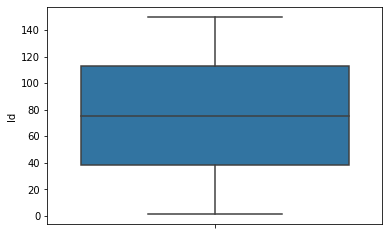

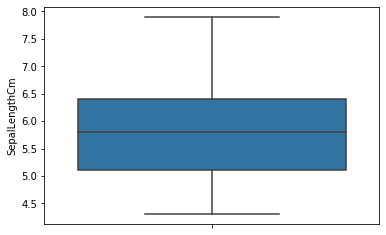

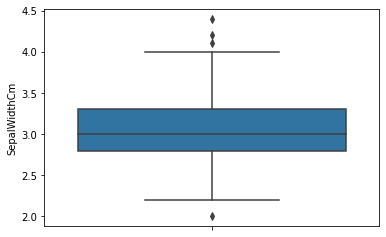

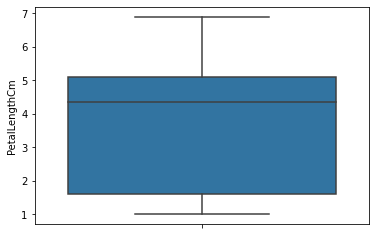

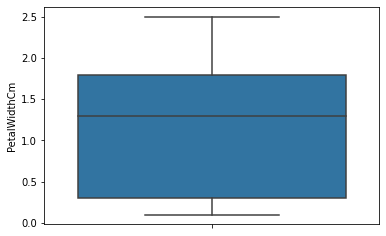

In [ ]:
# To find outliers
cols = df.columns[0:-1]
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()

In [ ]:
# To remove outliers from 'sepalwidthcm'
q1 = df['SepalWidthCm'].quantile(0.25)
q3 = df['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1
df = df[(df['SepalWidthCm'] >= q1-1.5*iqr) & (df['SepalWidthCm'] <= q3+1.5*iqr)]
df.shape # To find out the number of rows and column after outlier treatment


(146, 6)

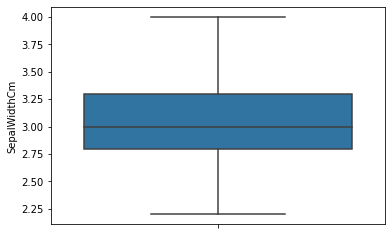

In [ ]:
# Blocplot for sepalwidthcm after outlier treatment
sns.boxplot(y=df['SepalWidthCm'])
plt.show()

In [ ]:
# Splitting the data into train and test sets
X = df.drop("Species",axis=1)
y = df["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state= 1)

In [ ]:
# Defining an object for DTC and fitting for whole dataset
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1 )
dt.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


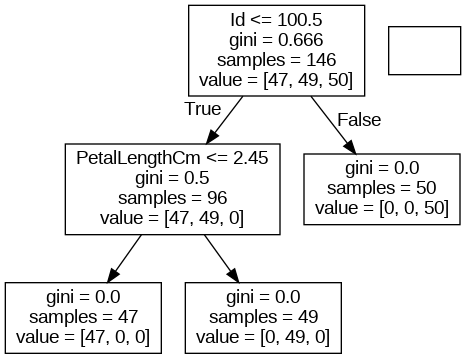

In [ ]:
# Plotting of decission tree
from IPython.display import Image
from sklearn.tree import export_graphviz

!pip install pydotplus
import pydotplus


features = X.columns
dot_data = export_graphviz(dt, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
# Defining an object for DTC and fitting for train dataset
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

In [ ]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  1.0


In [ ]:
#Classification for test before hyperparameter tuning
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        44
      macro avg       1.00      1.00      1.00        44
   weighted avg       1.00      1.00      1.00        44



In [ ]:
# Hyperparameter Tuning of DTC

dt = DecisionTreeClassifier(random_state=1)

params = {'max_depth' : [2,3,4,5],
        'min_samples_split': [2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5]}

gsearch = GridSearchCV(dt, param_grid=params, cv=3)

gsearch.fit(X,y)

gsearch.best_params_

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
# Passing best parameter for the Hyperparameter Tuning
dt = DecisionTreeClassifier(**gsearch.best_params_, random_state=1)

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

In [ ]:
print('Confusion Matrix - Train:','\n',confusion_matrix(y_train,y_pred_train))
print('\n','Confusion Matrix - Test:','\n',confusion_matrix(y_test,y_pred))

Confusion Matrix - Train: 
 [[32  0  0]
 [ 0 34  0]
 [ 0  0 36]]

 Confusion Matrix - Test: 
 [[15  0  0]
 [ 0 15  0]
 [ 0  0 14]]


In [ ]:
#Classification for test after hyperparameter tuning
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        44
      macro avg       1.00      1.00      1.00        44
   weighted avg       1.00      1.00      1.00        44



In [ ]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  1.0
